## Just mucking around with veneer

First of all set up veneer

In [1]:
from veneer.manage import start, create_command_line, kill_all_now
import veneer

In [ ]:
# I will put this here just for reference, this cell can be run to shutdown all of the veneer instatiated source models
kill_all_now(processes)

I'm just going to start one copy of the hydro model by defining the veneer location, the model and the server port

In [2]:
path = 'C:\\Users\\bennettf\\Desktop\\vcmd\\FlowMatters.Source.VeneerCmd.exe'
    
catchment_project='C:/test/MW_RC7_Hydro.rsproj'
#catchment_project='C:/Users/bennettf/OneDrive/python_stuff/Jupyter_Notebooks/veneer/doc/training/ExampleProject/CalibrationExample.rsproj'
num_copies=1    # Important - set this to be a number ~ the number of CPU cores in your system!
first_port=9950

In [3]:
#Now, ope the project
processes,ports = start(catchment_project,
                        n_instances=num_copies,
                        ports=first_port,
                        debug=True,
                        veneer_exe=path,
                        remote=False )

Starting C:\Users\bennettf\Desktop\vcmd\FlowMatters.Source.VeneerCmd.exe -p 9950 -s  C:\test\MW_RC7_Hydro.rsproj
[0] Loading plugins

[0] Loaded C:\Program Files\eWater\Source 4.1.1.4513\Plugins\DERMTools.dll

[0] Loaded C:\Program Files\eWater\Source 4.1.1.4513\Plugins\MonthlyEmcDwcModel.dll

[0] Loaded C:\Program Files\eWater\Source 4.1.1.4513\Plugins\CodeProjectWizardDemo.dll

[0] Loaded C:\Program Files\eWater\veneer\FlowMatters.Source.Veneer.dll

[0] Loaded C:\Users\bennettf\Desktop\GBR_DynSed_Extension.dll

[0] Loaded C:\Users\bennettf\Desktop\Dynamic_SedNet.dll

[0] Plugins loaded (6/6)

[0] Opening project file: C:\test\MW_RC7_Hydro.rsproj

ERROR[0] log4net:ERROR Failed to find configuration section 'log4net' in the application's .config file. Check your .config file for the <log4net> and <configSections> elements. The configuration section should look like: <section name="log4net" type="log4net.Config.Log4NetConfigurationSectionHandler,log4net" />

[0] Loading project

[0] Pro

Assign the veneer client

In [4]:
vs = [veneer.Veneer(port=p) for p in ports]
v = vs[0]

Have a look to see what models are associated with the model

In [5]:
v.model.find_model_type('')

['TIME.Applications.RainfallRunoff.TSNoTransform',
 'TIME.Applications.RainfallRunoff.PanFactors',
 'TIME.Applications.RainfallRunoff.ExtractCoupledTimeSeries',
 'TIME.Applications.RainfallRunoff.ExtractDataTransform',
 'TIME.Applications.RainfallRunoff.ToMonthlyDataTransformWithMissingValueThreshold',
 'TIME.Applications.RainfallRunoff.ToMonthlyDataTransform',
 'TIME.Tools.Metaheuristics.Tests.TestLumpedCatDefCreation+TestModel',
 'RiverSystem.Controls.Nodes.Storages.ViewModel.StorageGaugedLevelViewModel',
 'GBR_DynSed_Extension.Parameterisation.Models.GBRUSLECoverTimeSeriesSpatialPreprocessorModel',
 'GBR_DynSed_Extension.Parameterisation.Models.PesticideDecayParameterisationModel',
 'GBR_DynSed_Extension.Parameterisation.Models.LewisTrappingParameterisationModel',
 'GBR_DynSed_Extension.Parameterisation.Models.HowLeakyParameterisationModel',
 'GBR_DynSed_Extension.Parameterisation.Models.APSIMparameterisationModel',
 'GBR_DynSed_Extension.Models.Lewis_Trapping_Model',
 'GBR_DynSed_E

There are many, but we are interested in the Sacramento model **TIME.Models.RainfallRunoff.Sacramento.Sacramento**. Let's find out what parameters belog to this model 


In [6]:
params = v.model.find_parameters('TIME.Models.RainfallRunoff.Sacramento.Sacramento')
params

['Adimp',
 'Lzfpm',
 'Lzfsm',
 'Lzpk',
 'Lzsk',
 'Lztwm',
 'Pctim',
 'Pfree',
 'Rexp',
 'Rserv',
 'Sarva',
 'Side',
 'Ssout',
 'UH1',
 'UH2',
 'UH3',
 'UH4',
 'UH5',
 'Uzfwm',
 'Uzk',
 'Uztwm',
 'Zperc']

Cool, let's now have a look at the catchments defined in the network

In [9]:
v.model.catchment.names()

['SC #158',
 'SC #35',
 'SC #25',
 'SC #55',
 'SC #45',
 'SC #75',
 'SC #65',
 'SC #2',
 'SC #150',
 'SC #4',
 'SC #152',
 'SC #6',
 'SC #154',
 'SC #155',
 'SC #156',
 'SC #157',
 'SC #16',
 'SC #36',
 'SC #26',
 'SC #56',
 'SC #46',
 'SC #76',
 'SC #66',
 'SC #160',
 'SC #93',
 'SC #83',
 'SC #163',
 'SC #164',
 'SC #165',
 'SC #99',
 'SC #13',
 'SC #138',
 'SC #33',
 'SC #23',
 'SC #53',
 'SC #43',
 'SC #73',
 'SC #63',
 'SC #5',
 'SC #131',
 'SC #132',
 'SC #133',
 'SC #134',
 'SC #130',
 'SC #136',
 'SC #137',
 'SC #96',
 'SC #151',
 'SC #1',
 'SC #90181',
 'SC #90180',
 'SC #90183',
 'SC #90182',
 'SC #90185',
 'SC #90184',
 'SC #90187',
 'SC #90186',
 'SC #84',
 'SC #90188',
 'SC #14',
 'SC #34',
 'SC #24',
 'SC #54',
 'SC #44',
 'SC #74',
 'SC #90167',
 'SC #159',
 'SC #91',
 'SC #81',
 'SC #161',
 'SC #94',
 'SC #11',
 'SC #118',
 'SC #31',
 'SC #21',
 'SC #51',
 'SC #41',
 'SC #71',
 'SC #61',
 'SC #110',
 'SC #92',
 'SC #112',
 'SC #113',
 'SC #114',
 'SC #115',
 'SC #116',


Now list the FUs

In [11]:
v.model.catchment.get_functional_unit_types()

['Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 'Water',
 'Conservation',
 

I want to find the value for a Sac parameter for a particular FU/catchment combination

In [12]:
v.model.catchment.runoff.get_param_values('Adimp',fus=['Water'], catchments = ['SC #158'])

[0.06460823]

Let's set a new value for that parameter

In [13]:
v.model.catchment.runoff.set_param_values('Adimp', 0.05 ,fus=['Water'], catchments = 'SC #158')

True

Thats done, now we will run the model but we will set up some recorders before that.

In [14]:
v.configure_recording(disable=[{}],enable=[{'RecordingVariable':'Downstream Flow Volume'}])

In [15]:
# Bombs away
v.run_model()

(302, 'runs/1')

Job done, now get some data from the model

In [16]:
downstream = v.retrieve_multiple_time_series(criteria={'RecordingVariable':'Downstream Flow Volume','NetworkElement':'gauge_125013A_PioneerRvDumbletonPumpStation'})

And lets have a look at it

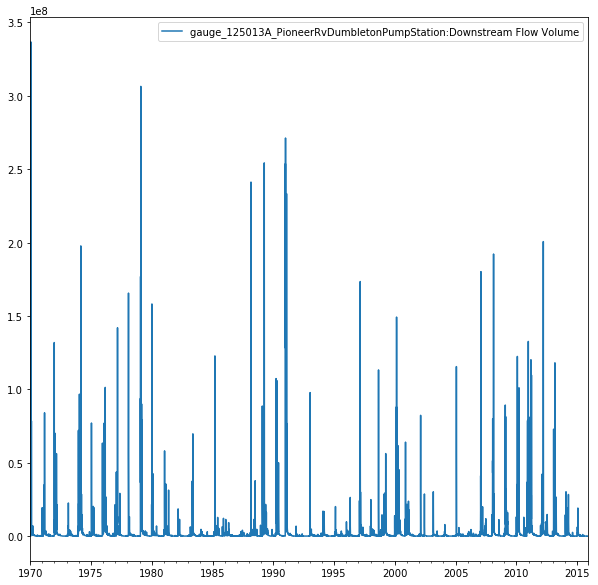

In [19]:
%matplotlib inline
downstream[['gauge_125013A_PioneerRvDumbletonPumpStation:Downstream Flow Volume']].plot(figsize=(10,10))